In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
#Set working directory
os.chdir("C:\\Users\\Vijay\\Downloads")

In [56]:
#Load data
train_df = pd.read_csv("winequality-red.csv")

In [4]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#### checking the null values of the dataset
train_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

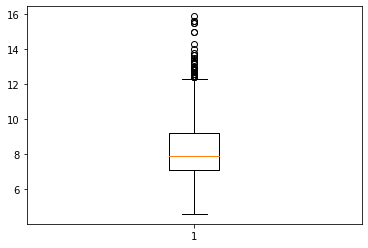

In [11]:
# checking the outliers in the data
plt.boxplot(train_df['fixed acidity'])
plt.show()

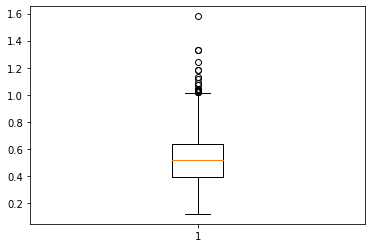

In [12]:
# checking the outliers in the data
plt.boxplot(train_df['volatile acidity'])
plt.show()

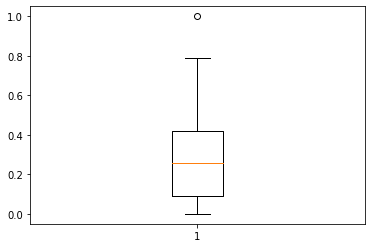

In [13]:
# checking the outliers in the data
plt.boxplot(train_df['citric acid'])
plt.show()

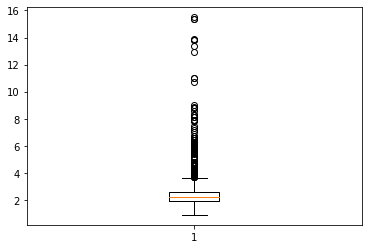

In [14]:
# checking the outliers in the data
plt.boxplot(train_df['residual sugar'])
plt.show()

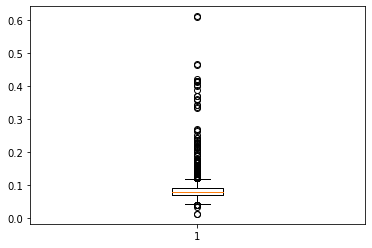

In [15]:
# checking the outliers in the data
plt.boxplot(train_df['chlorides'])
plt.show()

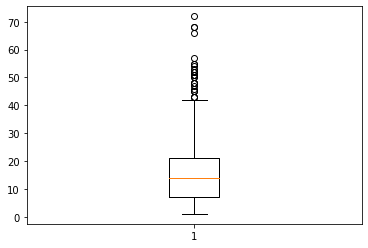

In [16]:
# checking the outliers in the data
plt.boxplot(train_df['free sulfur dioxide'])
plt.show()

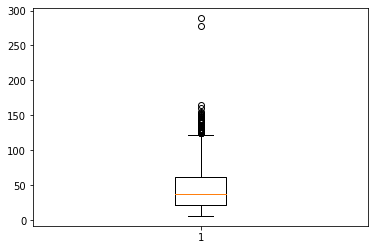

In [17]:
# checking the outliers in the data
plt.boxplot(train_df['total sulfur dioxide'])
plt.show()

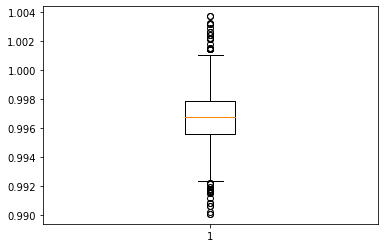

In [18]:
# checking the outliers in the data
plt.boxplot(train_df['density'])
plt.show()

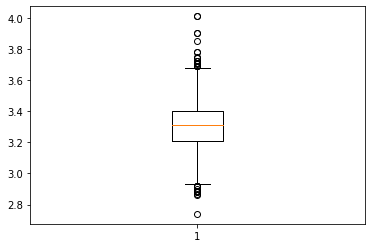

In [19]:
# checking the outliers in the data
plt.boxplot(train_df['pH'])
plt.show()

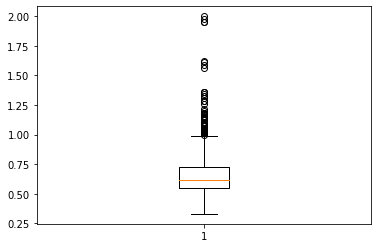

In [20]:
# checking the outliers in the data
plt.boxplot(train_df['sulphates'])
plt.show()

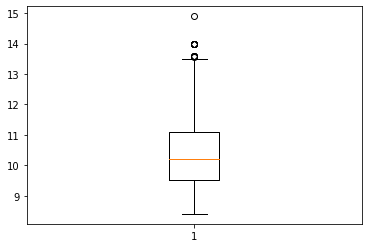

In [21]:
# checking the outliers in the data
plt.boxplot(train_df['alcohol'])
plt.show()

In [57]:
# checking the outliers through z score
# importing the library
from scipy.stats import zscore

In [58]:
z = np.abs(zscore(train_df.iloc[:,0:-1]))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 1.28864292, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.7199333 , 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.33117661, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.70550789, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.6773996 , 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.51112954, 0.01092425,
        0.54162988]])

In [59]:
threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [60]:
# removing the outliers of the data 
load_new = train_df[(z<3).all(axis=1)]
load_new.shape

(1458, 12)

In [ ]:
# importing the library
import seaborn as sns

In [9]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


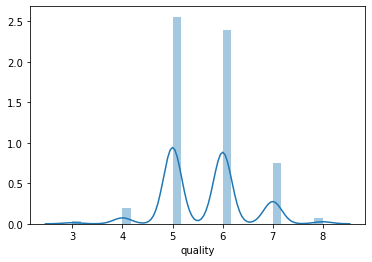

In [10]:
sns.distplot(train_df['quality'])
plt.show()   

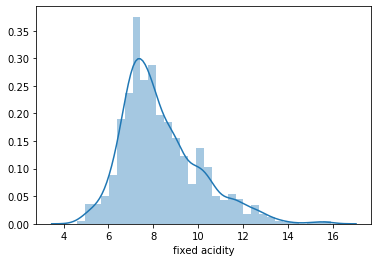

In [11]:
sns.distplot(train_df['fixed acidity'])
plt.show()   

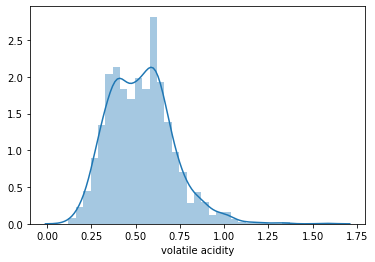

In [12]:
sns.distplot(train_df['volatile acidity'])
plt.show()   

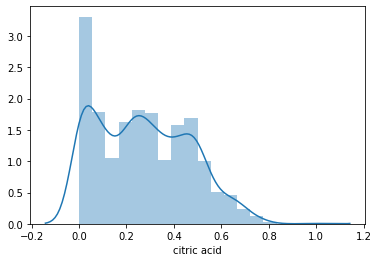

In [13]:
sns.distplot(train_df['citric acid'])
plt.show()   

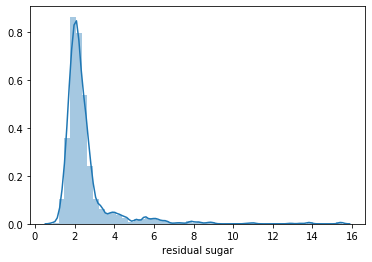

In [14]:
sns.distplot(train_df['residual sugar'])
plt.show()   

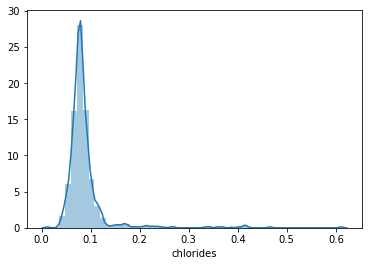

In [15]:
sns.distplot(train_df['chlorides'])
plt.show()   

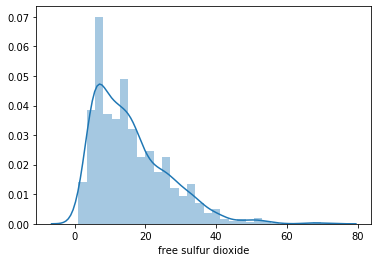

In [16]:
sns.distplot(train_df['free sulfur dioxide'])
plt.show()   

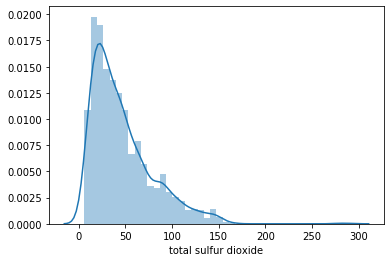

In [17]:
sns.distplot(train_df['total sulfur dioxide'])
plt.show()   

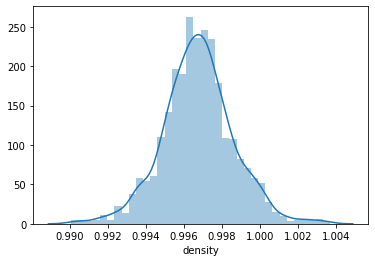

In [18]:
sns.distplot(train_df['density'])
plt.show()   

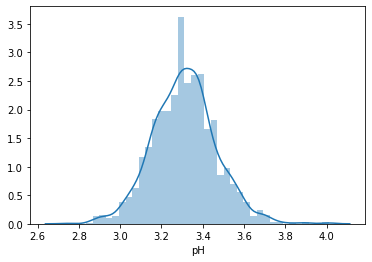

In [19]:
sns.distplot(train_df['pH'])
plt.show()   

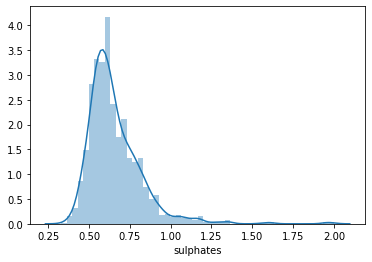

In [20]:
sns.distplot(train_df['sulphates'])
plt.show()   

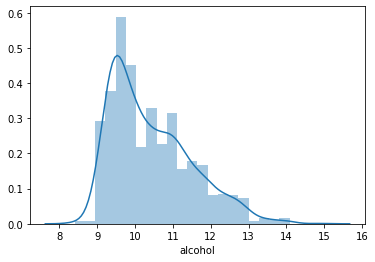

In [21]:
sns.distplot(train_df['alcohol'])
plt.show()   

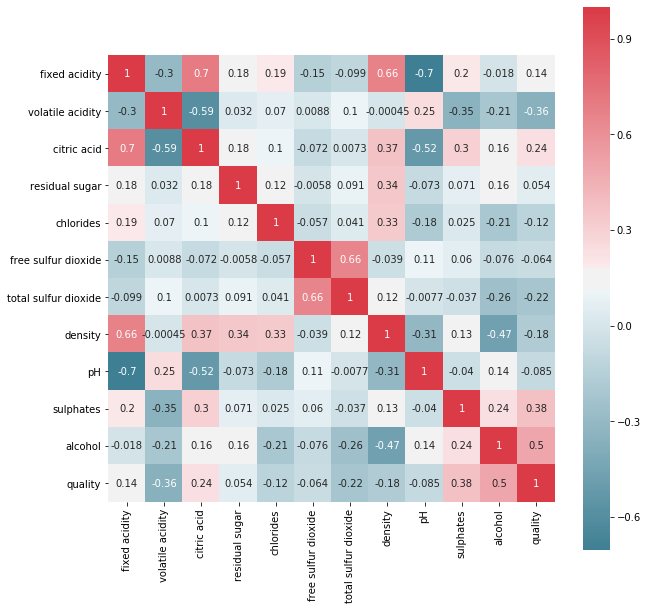

In [24]:
# finding the correlation between the continous variables
f,ax = plt.subplots(figsize=(10,10))
corr=load_new.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot = True)
plt.show()

In [61]:
load_new = load_new.drop(['fixed acidity'], axis=1)  #strong correlation between density and citric acid

In [33]:
load_new.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
#Import Libraries for decision tree

#Load Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
#Divide data into train and test
train, test = train_test_split(load_new, test_size=0.2)

In [42]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:10], train.iloc[:,10])

#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:10])


In [43]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,10], predictions_DT)

10.117999532109732

In [46]:
#Built Linear Regression
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,10], train.iloc[:,0:10]).fit()

In [47]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              9236.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):                        0.00
Time:                        12:48:50   Log-Likelihood:                         -1124.4
No. Observations:                1166   AIC:                                      2269.
Df Residuals:                    1156   BIC:                                      2319.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.9914      0.147     -6.727      0.000      -1.281      -0.702
citric acid             -0.3955      0.148     -2.672      0.008      -0.686      -0.105
residual sugar          -0.0145      0.022     -0.645      0.519      -0.058       0.030
chlorides               -2.6886      1.009     -2.666      0.008      -4.667      -0.710
free sulfur dioxide      0.0053      0.003      1.929      0.054   -9.14e-05       0.011
total sulfur dioxide    -0.0028      0.001     -3.148      0.002      -0.005      -0.001
density                  4.8095      0.579      8.311      0.000       3.674       5.945
pH                      -0.7475      0.164     -4.553      0.000      -1.070      -0.425
sulphates                1.4347      0.160      8.980      0.000       1.121       1.748
alcohol                  0.3194      0.021     15.223      0.000       0.278       0.361
==============================================================================
Omnibus:                       19.832   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.586
Skew:                          -0.130   Prob(JB):                     1.38e-07
Kurtosis:                       3.763   Cond. No.                     3.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:10]) 

In [49]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,10], predictions_LR)

8.96958209172909

In [52]:
#Random Forest
#Divide data into train and test
X = load_new.values[:, 0:10]
Y = load_new.values[:,10]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [53]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.42 degrees.


In [54]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [55]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.22 %.
